In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier

# Load Dataset

In [2]:
training_set = pd.read_csv("../dataset/cleaned_movie_train.csv")
Y=training_set['sentiment'].values
X=training_set['review'].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (32000,)
No. of Testing Examples:  (8000,)


In [3]:
# tf=TfidfVectorizer(max_features=2500,min_df=10,max_df=0.95)
tf=TfidfVectorizer(min_df=10,max_df=0.95,use_idf=True)

tf.fit_transform(x_train)
X_train=tf.transform(x_train) # for train data we can use fit_transfrom also.
X_test=tf.transform(x_test)
pickle.dump(tf, open('vectorizer2_mix.sav', 'wb'))

In [4]:
# Evaluating models peformance based on precision, recall and accuracy
def do_evaluation (predicted, actual, verbose=True):
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    accuracy = accuracy_score(actual,predicted)
    f1score = f1_score(predicted,actual)

    if verbose:
        print('"Evaluation"','| Precision ==',round(precision*100,2),'| Recall ==',round(recall*100,2),'| Accuracy ==',round(accuracy*100,2),'| F1 score ==',round(f1score*100,2))

# Training phase..

In [5]:
# Random Foreset Classifier
rnd_f = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=2)
rnd_f.fit(X_train,y_train)

# Testing phase
rnd_f_pred=rnd_f.predict(X_test)
print("Accuracy: ",round(accuracy_score(y_test,rnd_f_pred),3))
print ('{:.1%} of prediction are positive'.format(float(sum(rnd_f_pred))/len(y_test)))
print ('{:.1%} are actually positive'.format(float(sum(y_test))/len(y_test)))
do_evaluation (rnd_f_pred,y_test,verbose=True)

Accuracy:  0.853
50.3% of prediction are positive
50.0% are actually positive
"Evaluation" | Precision == 85.04 | Recall == 85.64 | Accuracy == 85.3 | F1 score == 85.34


In [6]:
pickle.dump(rnd_f, open('rnd2_mix_0.853_160,2,3.sav', 'wb'))

# E valuate classifier performance(roc and auc curve)

In [11]:
def display_curve(nb_pred,name):
    #Calculating False Positive Rate ,True Positive Rate and threshold
    fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_pred)
    #AUC is the percentage of the ROC plot that is underneath the curve:
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    plt.title(f'Operating Characteristic for {name} Classifier')
    plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

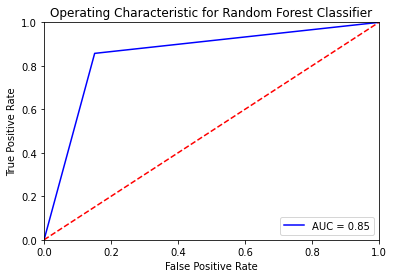

In [12]:
# Gaussian Naive Bayes Classifier
display_curve(rnd_f_pred,'Random Forest')

# Testing

In [39]:
# Load model
rnd_f = pickle.load(open('rnd2_mix_0.851_160,2,3.sav','rb'))
tf = pickle.load(open('vectorizer2_mix.sav','rb'))

# Testing
test_array = [
'entertaining film follows rehearsal process ny production best taking seriously recognizable actors john glover gloria reubens david lansbury nice jobs main roles highlight hilarious scene murder banquo john elsen rehearsed probably entertaining film involved theatre anyone enjoys shakespeare enjoy film',
'could otherwise run mill mediocre film infidelity sixties subtle free love period top happily ever ending time ever feel sympathy diane lane anna paquin troublesome middle class care free life feel emasculated liev shrieber story line plods along slowly predictable pathetic conclusion thing interesting watchable film stunning diane lane topless hint occurs 30 minutes film fast forward part skip rest',
'cosimo luis guzmán told prison perfectsoon five guys organizing crime five guys little brain capacity brothers anthony joe russo directors welcome collinwood 2002 crime comedy often funny cannot help laughing everything goes wrong guys great actors playing characters william macy plays riley isaiah washington leon sam rockwell pero michael jeter toto andy davoli basil gabrielle union plays love interest michelle jennifer esposito plays pero love interest carmela george clooney also producer plays jerzy tattooed guy wheelchair highly entertaining flick certainly recommend',
'summer full blockbusters comebacks woe find film could sit enjoy case want read page spoilers sum mature ella enchanted questionably violent parts plenty death handful scenes little blood small children try overly corny overstep bounds think bit serious bit magical princess bride close perhaps prodigious movie goer others maybe twice month feel active also huge sci fi fantasy fan get bored remade repetitive story lines films flash filling faster count 10 film diamond rough end august tired enough fractured expectations big hits averted seeing bourne ultimatum favor stardust hopes thoroughly muddied transformers fiction addiction previews stardust seemed appealing certainly wary many others utterly surprised gone thinking see another generic fantasy movie clichéd breakfast fooled definitely fairy tale indeed witches magic utterly requires suspension disbelief refreshing thing found based anything seen read past 15 years actually really good movie unlike 90 movies seem persistently appear like thorns side perhaps sign hollywood running ideas could read book year two years movie would another epic fantasy tale likes lotr rest says nyt doubt stardust bolted seat jam packed action every turn sweating bullets plot hook plot hook threatening tear dramatic tension apart echo throughout theater loud boom even use enormous blasts sound grab attention happening screen transformers looking trying show latest cgi techniques offend intelligence dimwitted dialogs story lines simple enough could figured 3rd grade boy hate watched watched enjoyed refreshingly creative storyline unfold eyes sure may known going happen throughout film makes forget even made heart twinge parts important aspect noticed left theater feeling better would gone truly gem much slush summer many remakes films fell short expectations like cold sweet cup tea cap hard work would done sitting others trying come money worth probably everyone favor enjoy fantasy films stand test time alone princess bride black cauldron dark crystal etc really see movie little diamond finding way dvd collection moment hits stores trust simply wonderful',
'best movie ever seen maybe live area sweden movie tells truth believe criticizes honors lifestyle dalarna producer wants people watch movie opened minded care closest friends relatives live another small village anywhere sweden another country probably also recognize much movie thank maria blom',
'story deals jet li fight oldfriends one problem friends superfighters film filled blood super action best stunts forever lau ching wan great co actor course movie typical hk fun love germany black mask uncut',
'emotional impact movie defies words elegant subtle beautiful tragic rolled two hours smith matures acting ability full range knew saw pursuit happiness thought must fluke blockbuster top actor smith performances movies portray whole dimension smith refinement talent selectivity scripts sure view differently seven pounds one movies order fully enjoy essence suspend belief watch plot watch fragile condition human heart literally metaphorically story human guilt atonement love sacrifice',
'oh man want give internal crow robot real workout movie pop ol vcr potential cut lines film endless minor spoilers ahead hey really care film quality spoiled traci girl problem psychology developed names child develops sexual crush opposite sex parent girl seems one sex one think term might mother dana played rosanna arquette whose cute overbite neo flowerchild sexuality luscious figure makes forgive number bad movies unsympathetic characters dana clueless daughter conduct seems competing gold medal olympic indulgent mother competition possible dana misses traci murderous streak truth told traci seems criminal skills hamster script dictates manages pull kind body count particularly hilarious note movie character carmen mexican maid described dana around long like one family although dresses director thought would say fell tomato truck guadalajara carmen wise traci scheming might also wear sign saying hey next victim sure enough traci confronts carmen carmen making way back mass bops one slightly angled lug wrenches car manufacturers put next spare bad joke rather suspect real life things useless murder weapon changing tire another sequence arquette wears flimsy dress vineyard cloudy skies talking owner cut another flimsy dress sunny skies talking owner brother cut wearing first dress first location cloudy skies supposed later get picture talking really bad directing skin expect much although traci nice couple bikinis looking trash wallow 8 anybody else',
'life time little richard told little richard produced directed little richard one sided one songs biography even docudrama good writing great energy outstanding leading actor playing richard music little richard rocks tight lipsync every song movie covers early childhood carrys thru formative years music wild success richard throwing away praise lord tied together well obvious comeback 1962 manages stay away idea little richard discovered beatles opened main objection outrageous counter cultural behavior underplayed get feel audience experienced time energy still come across full force seemed tame compared remember time best scenes richard getting jilted lucille writing song strip bikini shorts performing make point decent place change gotten bronze liberace richard use refer interviews story trust saw perform couple months ago still flirts pretty white boys giving one particularly good dancer audience headband nearly 68 still going strong recommend movie concert v appearance find little richard always',
'script weak enough character arcs make care one bit characters happens script way talky enough gore action even call slow paced story gets point want everyone shut die quickly possible listen talk muted stiff dialogue technical note music mix way high makes hard understand said times could called blessing overall story could better told short film running time 30 minutes obvious face homages sam raimi evil dead would good subtle seem like bald faced rip mon kind 35mm budget best could done still cinematography lighting design shots well done indeed',
'savage island raw savagery scare hell trust boy estranged savage family run city slicker tourists pa savage wants revenge stop nothing gets real horror film truly wonderful horror moments also negative review clearly comes someone lacks proper knowledge film filmmakers chose lighting camera work order reflect dark murky egdy mood story words obtain certain aesthetic fact film several horror film festival awards',
'docteur petiot starring michel serrault brutal yet preys weakest amidst populace imagery cinematography superb lend additional macabre feeling complex story perfect psychopath seductive altruistic intelligent caring calculating murderous movie certain forgotten soon viewer kudos mr serrault chilling portrayal',
'one favourite flicks unlike weak elvira stranded unfamiliar town death good witch elviras aunt morgana inherits ruby ring extremely powerful sought bad warlock uncle befriends four characters inadvertently helps grow throughout movie dog tow show uncle wicked witch west elvira realises strength within ends defeating end gets sent towns folk winning hearts finally gets destination las vegas dorothy home kansas many references made wizard oz throughout movie uncle quote lines relevant parallel characters elvira youe must aunt em must uncle remus place like home place like home bad uncle vinny get pretty little dog sign elvira passes first road trip mentions state kansas aside fact one sequences ripped um mean inspired flashdance pure genius roll around laughing titty twirling end 80 las vegas show got camp bone body movie cult camp classic',
'oscar nominations zero win yet understandlike done halle berry denzel washington whoopi oprah margaret avery danny glover etc amazing curious get scripts discussions oscars year go shoulda would coulda category judges amazing book true alice walker style writing way seeming like exaggerating characters glad screen adaptation took things cinematography amazing african scenes live much desired african part book supposed set liberia somewhere west africa oh steven spielberg thinks world dumb cannot think africa outside safaris yes complimentary zebra wildlife scene know none west africa get people speak swahili west africa speaks swahili get way story amazing film making world classic yes watch soul needs rejuvenation',
'kurt thomas stars jonathan cabot ninjas stand chance especially since cabot gymnast taken whole gymkata one helluva bad movie atrocious acting god awful script really incompetent directing make quality human standards however movie terrible becomes really really funny mean dialog know outsleep ha add mock value gymkata obtains besides wisely movie hero gymnast finds things swing heat moment',
'film pretty good big fan baseball glover joseph gordon levitt brenda fricker christopher lloyd tony danza milton davis jr brought variety talented actors understanding sport plot believable love message william dear guys put together great movie sports films revolve around true stories events often work well film hits 10 perfectness scale even though minor mistakes',
'warm funny film much vein works almodovar sure 10 year cannot understand readers found sick perverted would willing let 10 year old son play part sure spanish cinema often quite sexual open healthy way leaves viewer without sense voyeurism kink think northern european types attitude would much better result liberal attitude also seen hilarious fartman maurice character lover says people embarrassed farting turn art form',
'although great film something compelling memorable like never forgotten story ridiculously cumbersome title see opportunity feel like voyeur small town life evolves decades film one brings human face historical drama early twentieth century progress engaging enough young viewer memorable enough older one furthermore easy like characters watch passage time',
'movie distinct albeit brutish rough humanity borderline depravity zippy like terrorizing woman train semi pitiful vulnerability lurks never far away dewaere sucks breasts like baby blier cuts away scene depardieu may rape dewaere never sure explicitly read manifestly homoerotic aspect relationship either way incident start relative humanization movie could certainly read pro gay although could likely read pro anything want movie many objectionable scenes points sexual politics probably best taken general cartoon foibles sexes making mockery whole notion sensitivity honesty hitting numerous points possible profundity basis fire enough shots bound hit',
'one remarkable sci fi movies millennium movie incredible establishes new standard f movies hail kill',
'care peopl vote movi bad want truth good thing movi realli get one',
'never realli understood controversi hype provok social drama could ever experi yeah right might littl shock mayb often see someon get shot ars weak pointless plot sure think much bais moi anoth one blame everyth go wrong societi film gener convinc 99 peopl function perfectli well societi would blame exact societi vile hopeless act two derang nymph girl two main charact miser life introduc separ flash nadin kill roommat manu shot brother two meet abandon train station late night decid travel around franc togeth leav trail sex blood behind wherev made stop although constantli expos pornographi violenc film bore sit like girl indic time dialogu lame peopl run kill uninterest peopl want make porno movi fine pleas pretend art hous film make leav swear hip camera work see arous pornographi cool soundtrack though',
'sweet entertain tale young find work retir eccentr tragic actress well act especi juli walter rupert grint play role teenag boy well show talent last longer harri potter seri film laura linney play ruthlessli strict mother without hint redempt room like film entertain film made well british style like keep mum calendar girl',
'first mention realli enjoy skin man peach hip girl although owe debt tarentino pulp fiction ishii cast task carri stori entir film crackl energi scene asano tadanobu gashuin tatsuya particularli engag action intrigu bizarr character enough sex keep thing interest utterli unpredict stori line certain amount anticip optim began watch parti 7 enthusiasm certainli piqu open credit left wife actual stun dynam excit mix anim live action work brilliant actual movi start actual much start sort shuffl side door stand fumbl pocket look uncomfort entir film take place three room one futurist voyeur paradis borrow bit shark skin man anoth travel agent offic third far use seedi hotel room room cast seven charact meet approxim noth realli stranger talk film one time favorit dinner andr talkiest talk film dinner andr far excit two middl age men discuss life dinner key andr gregori wallac shawn tell interest stori cast parti 7 liter whine entir film ye realli ye realli realli realli ye realli get idea hope wish direct parti 7 unbeliev unengag film flimsiest plot money stolen yakuza like shark skin man accompani almost action interest dialog charact larg uninterest ishii took throwaway convers moment tarentino film built entir film around tarentino convers alway intern logic wit call royal chees dialog duller imagin brief hilari cameo gashuin alway marvel low key perform awesom asano tadanobu would given parti 7 singl star realli chore make way',
'argentinian music poet film feel music repeat world time countri histori first listen play tri make other hear believ hear nobodi say anyth peopl appear listen other recogn heard think other might hear final everybodi listen music suddenli sound love poetri real nation legaci father child would call film dead nobodi dy spanish translat titl refus follow rule call dublin follow jame joyc titl nice 1900 irish film postcard',
'saw film chanc small box fantast chill cannot believ still wait 5 vote',
'small california town diablo plagu mysteri death sheriff robert lopez unearth ancient box legend box hold sixteenth centuri mexican demon name azar fbi agent gil vega sent investig murder join forc sheriff daughter dominiqu mari fight evil bloodthirsti demon legend diablo absolut garbag film lack scare gore act amateurish direct bad anim one aspect film enjoy big fan indi horror flick exampl love torch live feed bone sick neighborhood watch unfortun legend diablo huge misfir definit one avoid',
'good see vintag film buff correctli categor excel dvd releas excus elabor girli show kitti carlisl gertrud michael lead cast super decor girl includ ann sheridan luci ball beryl wallac gwenllian gill gladi young barbara fritchi wanda perri dorothi white carl brisson also hand lend strong voic cocktail two undoubtedli movi popular song heard le four time howev gertrud michael steal show rendit sweet marijauna strong perform hero reject girlfriend rest cast could done without jack oaki victor mclaglen altogeth good thing oaki role weak run gag cult icon tobi wing fact give idea far rest comedi indulg strain super dumb inspector mclaglen simpli cannot put hand killer even though would believ instanc happen person suspect director mitch leisen actual go great pain point killer even dumbest member cinema audienc give player concern close close',
'saw film via one actor agent sure conform great deal come film excel mostli kid actor ham embarrass case realli good term surreal thingi mention jingo well think film plain weird real weirdo film weirdo locat storylin weird stuff go whole time good weird oppos bad hard think movi like like car ate pari mayb like repuls actual think like hammer movi 60 certainli interest mind work behind jingo question also titl modern love anyon also jingo mean god forsaken talk australia hmm curiou',
'civil war mani case divid loyalti obvious mani occur border owen moor go join union armi shortli confeder soldier henri walthal separ regimen wander onto enemi properti desper water find suppli unionist young daughter gladi egan sit yanke soldier track littl gladi innoc help confeder hide later return kill father littl girl kind rememb sweet small stori director w griffith locat footag human lovingli display border state 6 13 10 w griffith henri walthal owen moor gladi egan'
]
test_result = [1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,0,1,1,0]
test_func = lambda x: 'pos' if x==1 else 'neg'
random_f = rnd_f.predict(tf.transform(test_array).toarray())

count_currect = 0
for sentence,l,r in zip(test_array,random_f,test_result):
    # print(sentence,': Random Forest=',test_func(l))
    if l==r:
        count_currect +=1

print('Random Forest',count_currect/len(test_result)*100)


Random Forest 86.66666666666667
